<a href="https://colab.research.google.com/github/teja-1403/Zeotap-Data-Science-Assignment/blob/main/SaiTeja_TBV_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load the datasets
customers_df = pd.read_csv('/content/Customers.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

In [3]:
# Preprocess the data (merge customers and transactions data)
# Merge the customers and transactions data on CustomerID
df = pd.merge(transactions_df, customers_df, on='CustomerID')

In [4]:
# Aggregate the data: Total amount spent and total quantity purchased by each customer
customer_data = df.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    total_quantity=('Quantity', 'sum'),
    total_transactions=('TransactionID', 'nunique')
).reset_index()

In [5]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['total_spent', 'total_quantity', 'total_transactions']])

In [6]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

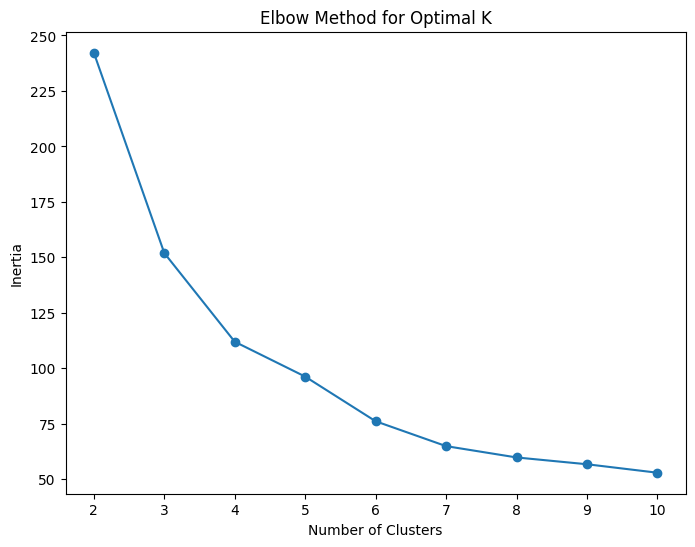

In [7]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
# From the plot, choose the optimal number of clusters
optimal_k = 5

In [9]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

In [10]:
# Calculate DB Index for the clustering
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.8967286185530712


In [14]:
silhouette_avg = silhouette_score(scaled_data, customer_data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3605519306620684


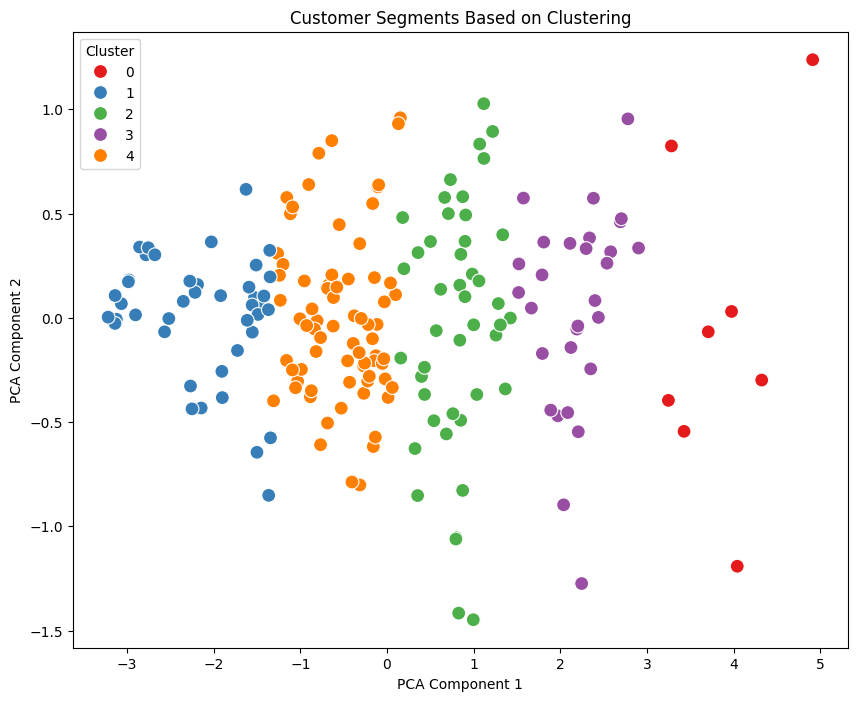

In [11]:
# Visualize the clusters using PCA for 2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
customer_data['PCA1'] = principal_components[:, 0]
customer_data['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=customer_data, s=100)
plt.title('Customer Segments Based on Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()